###  MACHINE LEARNING FOR AGRICULTURE HACKATHON - AnalyticsVidhya

Rank : 54  [ Top 10 percentile]

Accuracy : 84.83%

AGENDA:  To classify the status of the crop based on the independent features are,
    1. estimated insects count
    2. Dosage per week
    3. no of weeks used
    4. no of weeks quit
    5. soil type
    6. crop type
    7. pesticide use Category
    8. Season
Target Variable:
    Crop damage - [0- Alive, 1- Damaged due to other causes , 2- Damaged due to pesticides]

Problem type : Multi Class Classification problem
    
Imbalanced Data :  Resolved using SMOTE, made all the class to equal count.
    
Algorithm used : LightGBM Classifier

metrics : Accuracy 

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os

In [3]:
os.chdir("C:\\Users\\Soma\\Documents\\kumz\\analyticsvidhya\\agri")

In [4]:
dt_tr=pd.read_csv("train_yaOffsB.csv")     ## train 
dt_ts=pd.read_csv("test_pFkWwen.csv")      ## test

In [5]:
dt_tr.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [6]:
dt_tr.shape

(88858, 10)

In [7]:
dt_tr.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

### DATA PREPROCESSING

In [8]:
dt_tr["Crop_Type"]=dt_tr["Crop_Type"].astype(str)
dt_tr["Soil_Type"]=dt_tr["Soil_Type"].astype(str)
dt_tr["Pesticide_Use_Category"]=dt_tr["Pesticide_Use_Category"].astype(str)
dt_tr["Season"]=dt_tr["Season"].astype(str)


In [9]:
dt_ts["Crop_Type"]=dt_ts["Crop_Type"].astype(str)
dt_ts["Soil_Type"]=dt_ts["Soil_Type"].astype(str)
dt_ts["Pesticide_Use_Category"]=dt_ts["Pesticide_Use_Category"].astype(str)
dt_ts["Season"]=dt_ts["Season"].astype(str)

####  Distribution Visualization

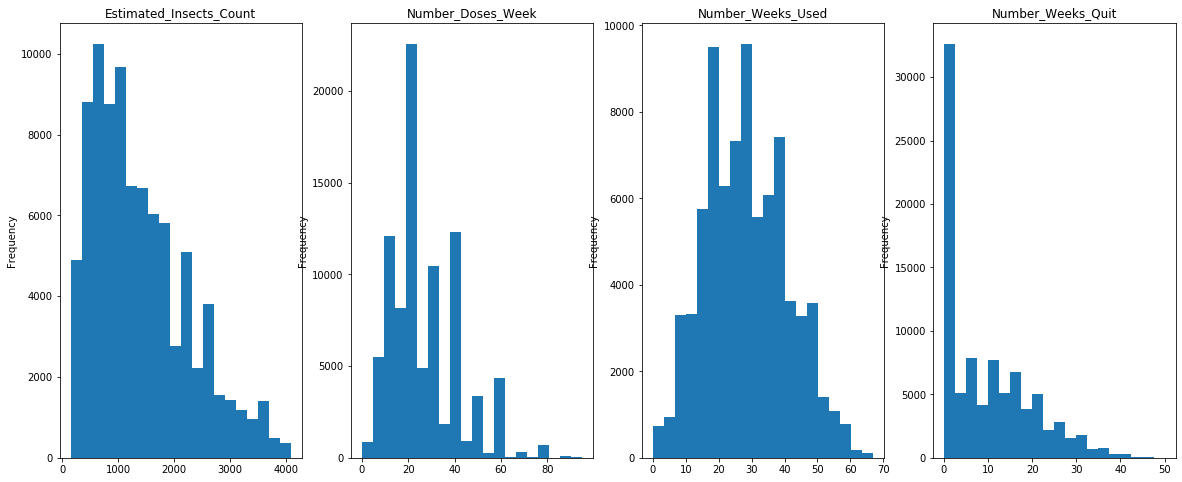

In [10]:
# Continuous Variable

fig, axes = plt.subplots(nrows=1, ncols=4, figsize = (20,8))
dt_tr.Estimated_Insects_Count.plot(kind='hist',bins=20, ax=axes[0], title='Estimated_Insects_Count')
dt_tr.Number_Doses_Week.plot(kind='hist',bins=20, ax=axes[1], title='Number_Doses_Week')
dt_tr.Number_Weeks_Used.plot(kind='hist',bins=20, ax=axes[2], title='Number_Weeks_Used')
dt_tr.Number_Weeks_Quit.plot(kind='hist',bins=20, ax=axes[3], title='Number_Weeks_Quit')

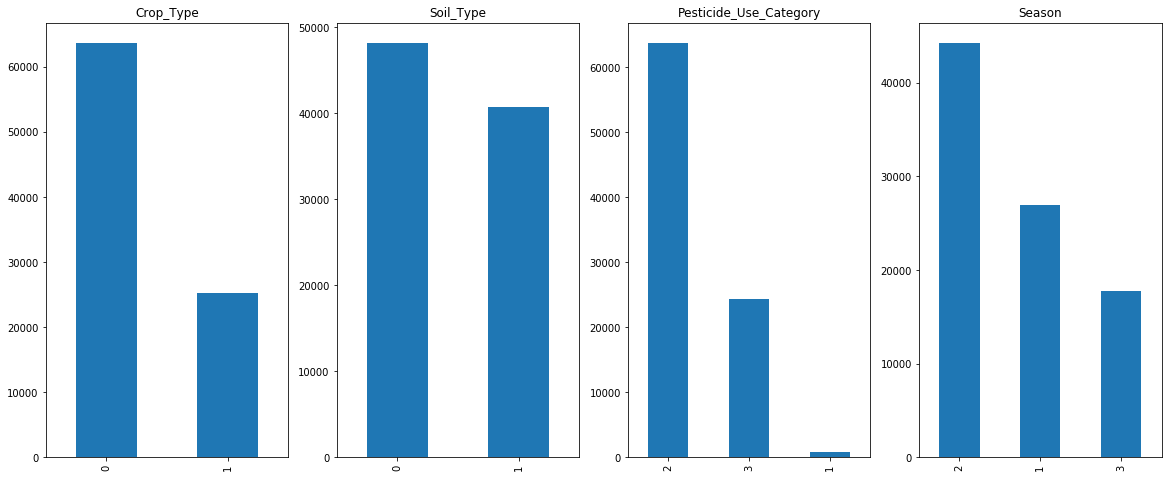

In [11]:
# Discrete Variable

fig, axes = plt.subplots(nrows=1, ncols=4, figsize = (20,8))
dt_tr.Crop_Type.value_counts().plot(kind='bar', ax=axes[0], title='Crop_Type')
dt_tr.Soil_Type.value_counts().plot(kind='bar', ax=axes[1], title='Soil_Type')
dt_tr.Pesticide_Use_Category.value_counts().plot(kind='bar', ax=axes[2], title='Pesticide_Use_Category')
dt_tr.Season.value_counts().plot(kind='bar', ax=axes[3], title='Season')

### DETECTING OUTLIER Using IQR

In [12]:
# Detecting outlier 

def outliers(x):
    st=x.quantile(0.25)
    rd=x.quantile(0.75)
    IQR=rd-st
    no_lesser=IQR-st              # no value should be less than this
    no_greater=IQR+rd             # no value should be greater than this
    return no_lesser, no_greater


In [13]:
# TRAIN DATASET


print(outliers(dt_tr["Estimated_Insects_Count"]))
print(outliers(dt_tr["Number_Doses_Week"]))
print(outliers(dt_tr["Number_Weeks_Used"]))
print(outliers(dt_tr["Number_Weeks_Quit"]))

(436.0, 3065.0)
(10.0, 65.0)
(-3.0, 54.0)
(16.0, 32.0)


In [14]:
dt_tr["Estimated_Insects_Count"]=np.where(dt_tr["Estimated_Insects_Count"]>3065,3065,dt_tr["Estimated_Insects_Count"])
dt_tr["Estimated_Insects_Count"]=np.where(dt_tr["Estimated_Insects_Count"]<436,436,dt_tr["Estimated_Insects_Count"])

dt_tr["Number_Doses_Week"]=np.where(dt_tr["Number_Doses_Week"]>65,65,dt_tr["Number_Doses_Week"])
dt_tr["Number_Doses_Week"]=np.where(dt_tr["Number_Doses_Week"]<10,10,dt_tr["Number_Doses_Week"])

dt_tr["Number_Weeks_Used"]=np.where(dt_tr["Number_Weeks_Used"]>54,54,dt_tr["Number_Weeks_Used"])

In [15]:
# TEST DATA SET


print(outliers(dt_ts["Estimated_Insects_Count"]))
print(outliers(dt_ts["Number_Doses_Week"]))
print(outliers(dt_ts["Number_Weeks_Used"]))
print(outliers(dt_ts["Number_Weeks_Quit"]))

(436.0, 3065.0)
(10.0, 65.0)
(-2.0, 56.0)
(16.0, 32.0)


In [16]:
dt_ts["Estimated_Insects_Count"]=np.where(dt_ts["Estimated_Insects_Count"]>3065,3065,dt_ts["Estimated_Insects_Count"])
dt_ts["Estimated_Insects_Count"]=np.where(dt_ts["Estimated_Insects_Count"]<436,436,dt_ts["Estimated_Insects_Count"])

dt_ts["Number_Doses_Week"]=np.where(dt_ts["Number_Doses_Week"]>65,65,dt_ts["Number_Doses_Week"])
dt_ts["Number_Doses_Week"]=np.where(dt_ts["Number_Doses_Week"]<10,10,dt_ts["Number_Doses_Week"])

dt_ts["Number_Weeks_Used"]=np.where(dt_ts["Number_Weeks_Used"]>56,56,dt_ts["Number_Weeks_Used"])

### IMPUTING NULL VALUE

In [17]:
dt_tr.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [18]:
dt_tr.loc[dt_tr['Number_Doses_Week'] == 0,'Number_Weeks_Used'] = dt_tr.loc[dt_tr['Number_Doses_Week'] == 0,'Number_Weeks_Used'].fillna(0)

dt_ts.loc[dt_ts['Number_Doses_Week'] == 0,'Number_Weeks_Used'] = dt_ts.loc[dt_ts['Number_Doses_Week'] == 0,'Number_Weeks_Used'].fillna(0)


In [19]:
dt_tr["Number_Weeks_Used"].fillna(28,inplace=True)

In [20]:
dt_ts["Number_Weeks_Used"].fillna(28,inplace=True)

In [21]:
ID=dt_ts.ID

###  Feature engineering

In [22]:
# train dataset

dt_tr["total_duration"]=dt_tr["Number_Weeks_Used"]+dt_tr["Number_Weeks_Quit"]
dt_tr["week_used_ratio"]=dt_tr["Number_Weeks_Used"]/dt_tr["total_duration"]
dt_tr["week_quit_ratio"]=dt_tr["Number_Weeks_Quit"]/dt_tr["total_duration"]
dt_tr["week_used_ratio"].fillna(0,inplace=True)
dt_tr["week_quit_ratio"].fillna(0,inplace=True)

# test dataset
dt_ts["total_duration"]=dt_ts["Number_Weeks_Used"]+dt_ts["Number_Weeks_Quit"]
dt_ts["week_used_ratio"]=dt_ts["Number_Weeks_Used"]/dt_ts["total_duration"]
dt_ts["week_quit_ratio"]=dt_ts["Number_Weeks_Quit"]/dt_ts["total_duration"]
dt_ts["week_used_ratio"].fillna(0,inplace=True)
dt_ts["week_quit_ratio"].fillna(0,inplace=True)


In [23]:
dt_tr.tail()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,total_duration,week_used_ratio,week_quit_ratio
88853,F00155935,3065,1,0,2,10,12.0,44,3,0,56.0,0.214286,0.785714
88854,F00155938,3065,1,0,2,10,20.0,38,1,0,58.0,0.344828,0.655172
88855,F00155939,3065,1,0,2,15,40.0,8,2,0,48.0,0.833333,0.166667
88856,F00155942,3065,1,0,2,10,25.0,18,3,0,43.0,0.581395,0.418605
88857,F00155945,3065,1,0,2,20,37.0,7,3,0,44.0,0.840909,0.159091


In [24]:
dt_train=dt_tr.drop(["ID","total_duration","week_used_ratio","week_quit_ratio"],axis=1)

dt_test=dt_ts.drop(["ID","total_duration","week_used_ratio","week_quit_ratio"],axis=1)

In [30]:
X_train=dt_train.drop(["Crop_Damage"],axis=1)
y_train=dt_train["Crop_Damage"]

X_test=dt_test.copy()

In [31]:
X_train=pd.get_dummies(X_train, drop_first=True)

X_test=pd.get_dummies(X_test, drop_first=True)

In [32]:
print(X_train.shape, y_train.shape, X_test.shape)

(88858, 10) (88858,) (59310, 10)


#### Resolving Imbalanced dataset using SMOTE

In [33]:
!pip install imblearn

In [34]:
import imblearn
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [35]:
np.bincount(y_train_res)

array([74238, 74238, 74238], dtype=int64)

In [36]:
X_train.dtypes

Estimated_Insects_Count       int64
Number_Doses_Week             int64
Number_Weeks_Used           float64
Number_Weeks_Quit             int64
Crop_Type_1                   uint8
Soil_Type_1                   uint8
Pesticide_Use_Category_2      uint8
Pesticide_Use_Category_3      uint8
Season_2                      uint8
Season_3                      uint8
dtype: object

### MODEL BUILDING

Light GBM Algorithm

In [37]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,KFold,StratifiedKFold
import lightgbm as lgb
import xgboost as xgb

In [38]:
sk = StratifiedKFold(n_splits=5,shuffle=False,random_state=42)

C:\Users\Soma\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [39]:
mod = lgb.LGBMClassifier(boosting_type='gbdt',objective='multiclass',num_class=3,random_state=42,n_jobs=-1,verbose=1)

In [40]:
prms   = {"max_depth":[4,6,8,10],
          "learning_rate":[0.1,0.01,0.03,0.07,0.001],
          "subsample":[0.5,0.7,0.9],
          "colsample_bytree":[0.5,0.7,0.9],
          "reg_alpha":[0,0.25,0.5,1],
          "reg_lambda":[0,0.25,0.5,1],
          "num_leaves":[15,63,127],
          "min_data_in_leaf":[1,7,10,25,50,100],
          "n_estimators":list(range(450,670,20))}

In [41]:
lgbm_model = RandomizedSearchCV(estimator=mod,param_distributions=prms,cv=sk.split(X_train,y_train),scoring='accuracy')
lgbm_model.fit(X_train,y_train)

RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000002D85070CDE0>,
                   estimator=LGBMClassifier(num_class=3, objective='multiclass',
                                            random_state=42, verbose=1),
                   param_distributions={'colsample_bytree': [0.5, 0.7, 0.9],
                                        'learning_rate': [0.1, 0.01, 0.03, 0.07,
                                                          0.001],
                                        'max_depth': [4, 6, 8, 10],
                                        'min_data_in_leaf': [1, 7, 10, 25, 50,
                                                             100],
                                        'n_estimators': [450, 470, 490, 510,
                                                         530, 550, 570, 590,
                                                         610, 630, 650],
                                        'num_leaves': [15, 63, 127],
                               

In [42]:
lgbm_model.best_estimator_,lgbm_model.best_params_,lgbm_model.best_score_

(LGBMClassifier(colsample_bytree=0.9, max_depth=4, min_data_in_leaf=7,
                n_estimators=610, num_class=3, num_leaves=127,
                objective='multiclass', random_state=42, reg_alpha=0.25,
                reg_lambda=0, subsample=0.5, verbose=1),
 {'subsample': 0.5,
  'reg_lambda': 0,
  'reg_alpha': 0.25,
  'num_leaves': 127,
  'n_estimators': 610,
  'min_data_in_leaf': 7,
  'max_depth': 4,
  'learning_rate': 0.1,
  'colsample_bytree': 0.9},
 0.8474644732781078)

### Predicting the test Data set

In [43]:
pred1=lgbm_model.best_estimator_.predict(X_test)

In [44]:
sub1=pd.DataFrame({"ID":ID,"Crop_Damage":pred1})

In [45]:
sub1.shape

(59310, 2)

In [46]:
sub1.to_csv("submission11.csv",index=False)

In [ ]:
##########################

Accuracy : 84.83% on Test data 
